In [1]:
%%html
<style>
table {float:left}
</style>

# Анализ видеоигр


## Описание данных:


| Поле          | Описание                             |
| :-------------| :------------------------------------|
| Rank          | место по объему продаж               |
| Name          | название игры                        |
| Platform      | платформа, на которой выпущена игра  |
| Year          | год релиза                           |
| Genre         | жанр                                 |
| Publisher     | издатель                             |
| NA_Sales      | продажи в Северной Америке, в млн.   |
| EU_Sales      | продажи в Европе, в млн.             |
| JP_Sales      | продажи в Японии, в млн.             |
| Other_Sales   | продажи в остальном мире, в млн.     |
| Global_Sales  | продажи по всему миру, в млн.        |

## Задачи:

**1) Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.**

**2) На каких платформах произошло больше всего релизов? Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.**

**3) Игры каких издателей (Publisher) встречаются в датасете чаще всего?**

**4) В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)**

**5) Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах. Постройте боксплот, где:**
- **по оси x будет расположен жанр игры (Genre);**
- **по оси у – объем продаж в Японии (JP_sales).**

**6) Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?**

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Зададим стиль графиков
sns.set(font_scale=1.5,
        style="whitegrid",
        rc={'figure.figsize':(20, 8)})

In [4]:
# Загрузим данные, посмотрим на их размерность и отобразим первые 5 строк
data = pd.read_csv('games.csv')
print(f'Размерность данных "games" - {data.shape}')
data.head()

Размерность данных "games" - (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Посмотрим на типы данных в датафрейме
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
# Посмотрим есть ли пропущенные значения в данных
missing = data.isna().sum()
missing[missing > 0]

Year         271
Publisher     58
dtype: int64

In [7]:
# Удалим строки с пропущенными значениями
data.dropna(axis=0, inplace=True)

In [8]:
# Посмотрим на описательную статистику
data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


<hr>

### 1) Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [9]:
# Посчитаем количество выпущенных игр по годам
games_number = data \
            .groupby('Year', as_index=False) \
            .agg({'Name': 'count'}) \
            .rename(columns={'Name': 'Games_number'})

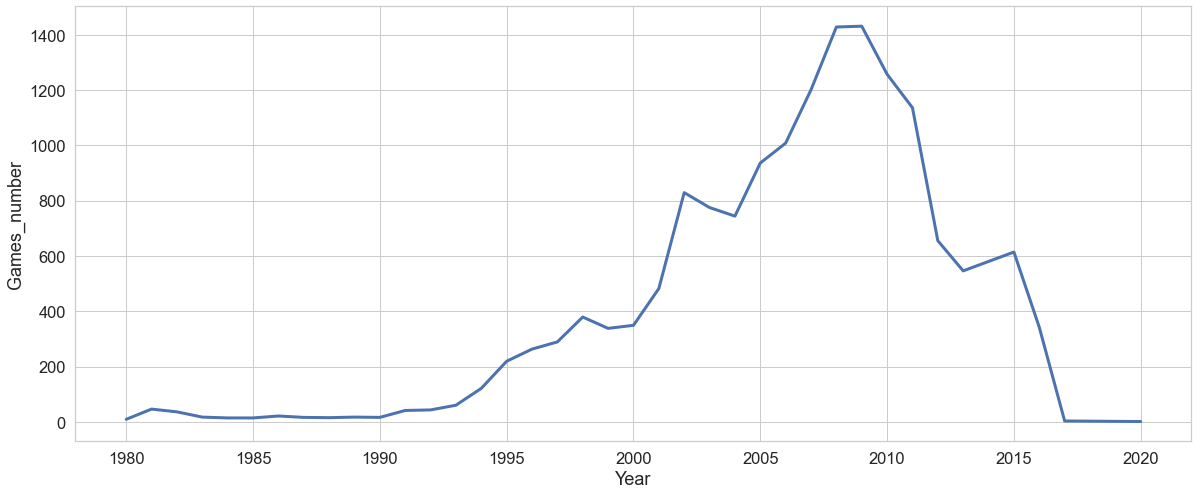

In [10]:
# Построим график распределения
sns.lineplot(data=games_number, x='Year', y='Games_number', linewidth = 3);

In [11]:
# Отобразим описательные характеристики переменной Year
table = pd.DataFrame({
    'Показатель': ['Среднее', 'Медиана', 'Мода'],
    'Значение': [int(np.mean(data.Year)), int(np.median(data.Year)), int(stats.mode(data.Year)[0][0])]})

table

,Показатель,Значение
0,Среднее,2006
1,Медиана,2007
2,Мода,2009


<hr>

### 2) На каких платформах произошло больше всего релизов? Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [12]:
# Сгруппируем данные по платформе и произведем необходимые вычисления
platforms = data \
        .groupby('Platform', as_index = False) \
        .agg({'Year': 'count'}) \
        .rename(columns={'Year': 'Number'}) \
        .sort_values('Number', ascending=False)

platforms['Percentage'] = (platforms.Number / data.shape[0]).mul(100)
platforms.head()

,Platform,Number,Percentage
4,DS,2131,13.080842
16,PS2,2127,13.056289
17,PS3,1304,8.004420
26,Wii,1290,7.918483
28,X360,1234,7.574735


In [13]:
# Выведем список платформ
platforms.query('Percentage > 7').Platform.tolist()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

<hr>

### 3) Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [14]:
# Отобразим топ 10 наиболее часто встречающихся издателей
data.Publisher.value_counts()[:10].to_frame().rename(columns={'Publisher': 'Frequency'})

,Frequency
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,682
Sega,632
Take-Two Interactive,412


<hr>

### 4) В каком регионе медианное значение объема продаж игр Nintendo является наибольшим?
*(Регионы: NA, EU, JP, Other)*

In [15]:
sales_by_region = data.query('Publisher == "Nintendo"')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_by_region.apply(np.median).to_frame().T

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.375,0.12,0.28,0.03


**В регионе NA_Sales медианное значение объема продаж является наибольшим.**

<hr>

### 5) Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах. Постройте боксплот, где:
- ### по оси x будет расположен жанр игры (Genre);
- ### по оси у – объем продаж в Японии (JP_sales).

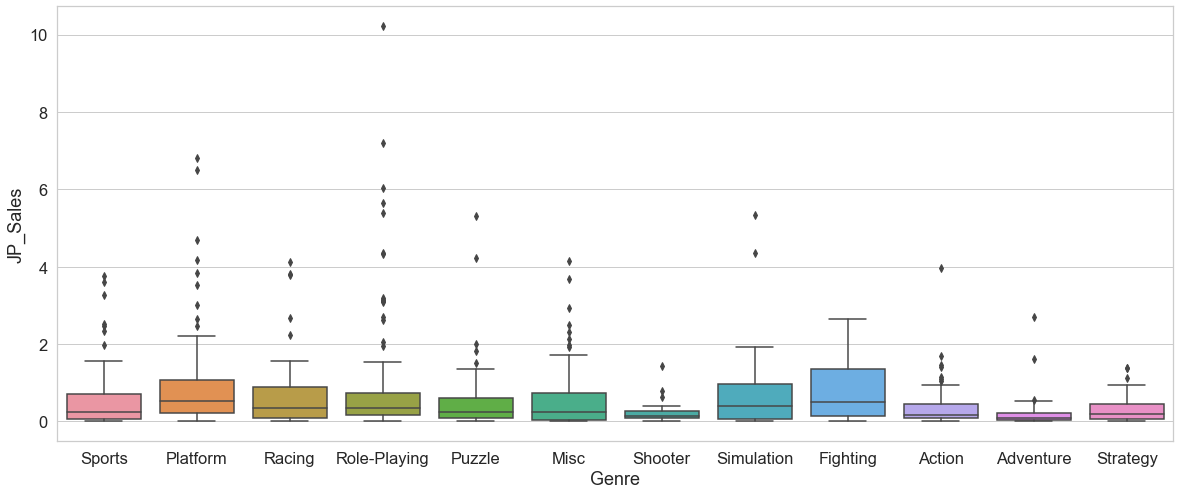

In [16]:
# Выберем требуемые столбцы и визуализируем их с помощью боксплот
jp_sales = data[['Publisher', 'Genre', 'JP_Sales']].query('Publisher == "Nintendo"')
sns.boxplot(x='Genre', y='JP_Sales', data=jp_sales);

In [17]:
# Сформируем сводную таблицу и посмотрим на медиану, среднее и межквартильный размах
jp_sales_by_genre = jp_sales.pivot_table(index='Genre', values='JP_Sales', aggfunc=['mean', 'median', stats.iqr])
jp_sales_by_genre

,mean,median,iqr
,JP_Sales,JP_Sales,JP_Sales
Genre,,,
Action,0.373846,0.170,0.3800
Adventure,0.257429,0.090,0.2000
Fighting,0.830000,0.500,1.2325
Misc,0.552500,0.250,0.6800
Platform,0.922162,0.540,0.8550
Puzzle,0.501216,0.255,0.5225
Racing,0.789730,0.340,0.7900
Role-Playing,0.970952,0.360,0.5800


-**Наибольший межквартильный размах наблюдается у игр жанра Fighting**<br>
-**Наименьший межквартильный размах наблюдается у игр жанра Adventure**

<hr>

### 6) Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

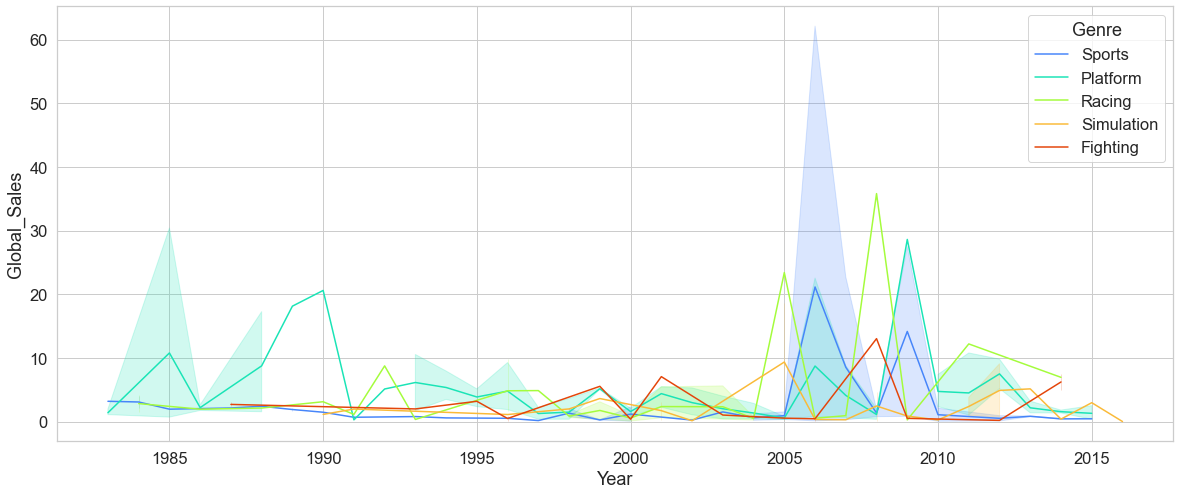

In [18]:
# Выберем требуемые столбцы и визуализируем их
genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
global_sales = data[['Publisher', 'Genre', 'Global_Sales', 'Year']].query('Publisher == "Nintendo" & Genre in @genres')
sns.lineplot(data=global_sales, x='Year', y='Global_Sales', hue='Genre', palette='turbo');

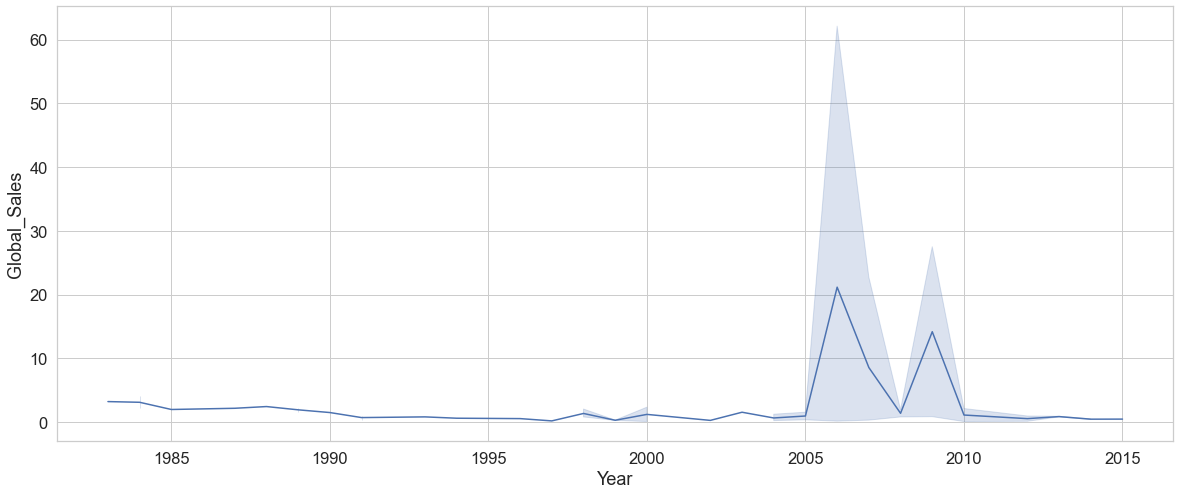

In [19]:
# Посмотрим на продажи игр жанра Sports на отдельном графике
sales_sports = data[['Publisher', 'Genre', 'Global_Sales', 'Year']].query('Publisher == "Nintendo" & Genre == "Sports"')
sns.lineplot(data=sales_sports, x='Year', y='Global_Sales');

**Отрезок, который включает в себя несколько крупных пиков по продажам игр жанра Sports - это период с 2005 по 2010 гг.**